In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load PRISM daily data
sumner = pd.read_csv("Sumner.csv")

# Parse date
sumner["Date"] = pd.to_datetime(sumner["Date"])

# Convert precipitation inches → mm
sumner["Precip_mm"] = sumner["ppt (inches)"] * 25.4


In [5]:
sumner["Year"] = sumner["Date"].dt.year
sumner["Month"] = sumner["Date"].dt.month

monthly = (
    sumner.groupby(["Year", "Month"])["Precip_mm"]
    .sum()
    .reset_index()
)

monthly["Date"] = pd.to_datetime(
    monthly["Year"].astype(str) + "-" +
    monthly["Month"].astype(str) + "-01"
)

monthly.head()


,Year,Month,Precip_mm,Date
0,1985,1,34.544,1985-01-01
1,1985,2,10.668,1985-02-01
2,1985,3,40.894,1985-03-01
3,1985,4,35.306,1985-04-01
4,1985,5,66.294,1985-05-01


In [6]:
sumner["Year"] = sumner["Date"].dt.year
sumner["Month"] = sumner["Date"].dt.month

monthly = (
    sumner.groupby(["Year", "Month"])["Precip_mm"]
    .sum()
    .reset_index()
)

monthly["Date"] = pd.to_datetime(
    monthly["Year"].astype(str) + "-" +
    monthly["Month"].astype(str) + "-01"
)

monthly.head()


,Year,Month,Precip_mm,Date
0,1985,1,34.544,1985-01-01
1,1985,2,10.668,1985-02-01
2,1985,3,40.894,1985-03-01
3,1985,4,35.306,1985-04-01
4,1985,5,66.294,1985-05-01


In [7]:
# 3-month accumulated precipitation
monthly["PPT_3"] = monthly["Precip_mm"].rolling(3).sum()

# SPI as standardized anomaly
mean_p = monthly["PPT_3"].mean()
std_p  = monthly["PPT_3"].std()

monthly["SPI_3"] = (monthly["PPT_3"] - mean_p) / std_p


In [8]:
near   = monthly[(monthly["Year"] >= 1985) & (monthly["Year"] <= 1999)]
middle = monthly[(monthly["Year"] >= 2000) & (monthly["Year"] <= 2009)]
far    = monthly[(monthly["Year"] >= 2010) & (monthly["Year"] <= 2024)]


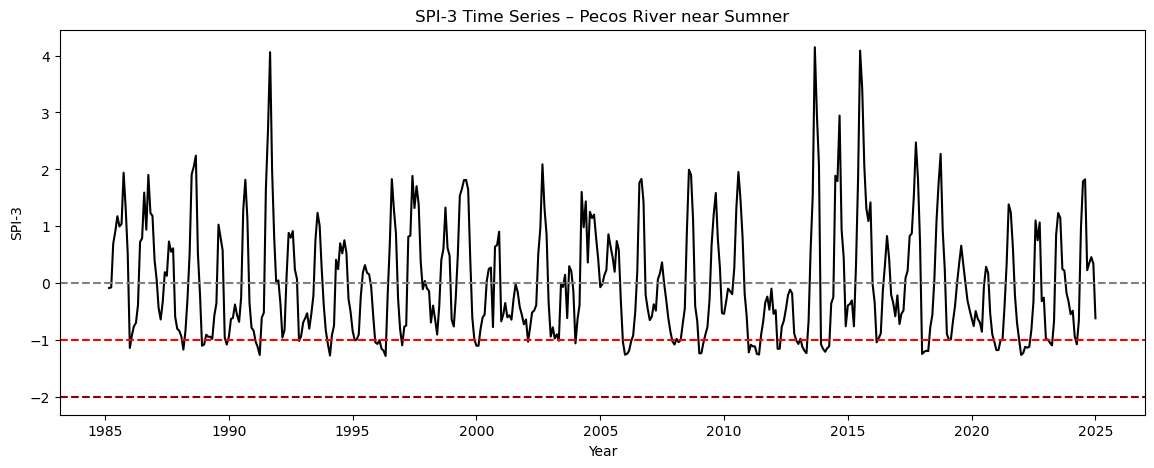

In [9]:
plt.figure(figsize=(14,5))
plt.plot(monthly["Date"], monthly["SPI_3"], color="black")
plt.axhline(0, color="gray", linestyle="--")
plt.axhline(-1, color="red", linestyle="--")
plt.axhline(-2, color="darkred", linestyle="--")

plt.title("SPI-3 Time Series – Pecos River near Sumner")
plt.ylabel("SPI-3")
plt.xlabel("Year")
plt.show()


In [12]:
monthly  # contains Year, Month, Precip_mm


,Year,Month,Precip_mm,Date,PPT_3,SPI_3
0,1985,1,34.544,1985-01-01,NaN,NaN
1,1985,2,10.668,1985-02-01,NaN,NaN
2,1985,3,40.894,1985-03-01,86.106,-0.082375
3,1985,4,35.306,1985-04-01,86.868,-0.071815
4,1985,5,66.294,1985-05-01,142.494,0.699108
...,...,...,...,...,...,...
476,2024,9,8.382,2024-09-01,108.712,0.230922
477,2024,10,69.088,2024-10-01,117.602,0.354129
478,2024,11,47.752,2024-11-01,125.222,0.459734
479,2024,12,0.000,2024-12-01,116.840,0.343568


In [13]:
baseline_mean = monthly["Precip_mm"].mean()
baseline_std  = monthly["Precip_mm"].std()


In [14]:
import numpy as np

n_years = 100
months = n_years * 12

# Optional: impose drying trend (example: -5% per 50 years)
trend = np.linspace(1.0, 0.90, months)

# Resample historical precipitation
synthetic_precip = np.random.choice(
    monthly["Precip_mm"].dropna(),
    size=months,
    replace=True
) * trend


In [15]:
future_spi = (synthetic_precip - baseline_mean) / baseline_std


In [16]:
import pandas as pd

future_dates = pd.date_range(
    start="2021-01-01",
    periods=months,
    freq="MS"
)

future = pd.DataFrame({
    "Date": future_dates,
    "SPI": future_spi
})

future["Year"] = future["Date"].dt.year


In [17]:
near_future   = future[future["Year"] <= 2070]
middle_future = future[(future["Year"] > 2070) & (future["Year"] <= 2090)]
far_future    = future[future["Year"] > 2090]


In [19]:
summer_months = [6, 7, 8, 9]


In [20]:
summer = monthly[monthly["Month"].isin([6,7,8,9])].copy()


In [23]:
# Rolling 3-month accumulation (still valid for summer)
summer["PPT_3"] = summer["Precip_mm"].rolling(3).sum()

# Historical summer baseline
summer_mean = summer["PPT_3"].mean()
summer_std  = summer["PPT_3"].std()

# Summer SPI-3
summer["SPI_3"] = (summer["PPT_3"] - summer_mean) / summer_std


In [24]:
baseline_year = 2020


In [25]:
import numpy as np
import pandas as pd

n_years = 100
summer_months = 4   # JJA+S
n_points = n_years * summer_months

# Optional drying trend (example: 10% over 100 years)
trend = np.linspace(1.0, 0.90, n_points)

# Resample historical summer precipitation
synthetic_summer_precip = np.random.choice(
    summer["Precip_mm"].dropna(),
    size=n_points,
    replace=True
) * trend


In [26]:
future_summer_spi = (synthetic_summer_precip - summer_mean) / summer_std


In [27]:
future_dates = []
year = baseline_year + 1

for _ in range(n_years):
    for m in [6,7,8,9]:
        future_dates.append(pd.Timestamp(year=year, month=m, day=1))
    year += 1

future_summer = pd.DataFrame({
    "Date": future_dates,
    "SPI": future_summer_spi
})

future_summer["Year"] = future_summer["Date"].dt.year


In [28]:
near_future   = future_summer[future_summer["Year"] <= baseline_year + 50]
middle_future = future_summer[
    (future_summer["Year"] > baseline_year + 50) &
    (future_summer["Year"] <= baseline_year + 70)
]
far_future    = future_summer[
    (future_summer["Year"] > baseline_year + 70) &
    (future_summer["Year"] <= baseline_year + 100)
]


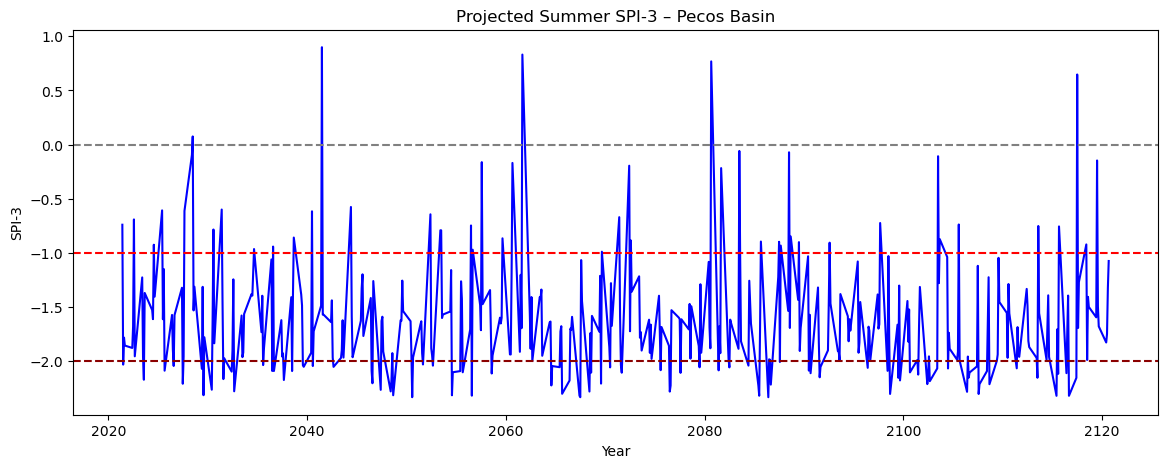

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(future_summer["Date"], future_summer["SPI"], color="blue")
plt.axhline(0, color="gray", linestyle="--")
plt.axhline(-1, color="red", linestyle="--")
plt.axhline(-2, color="darkred", linestyle="--")

plt.title("Projected Summer SPI-3 – Pecos Basin")
plt.ylabel("SPI-3")
plt.xlabel("Year")
plt.show()


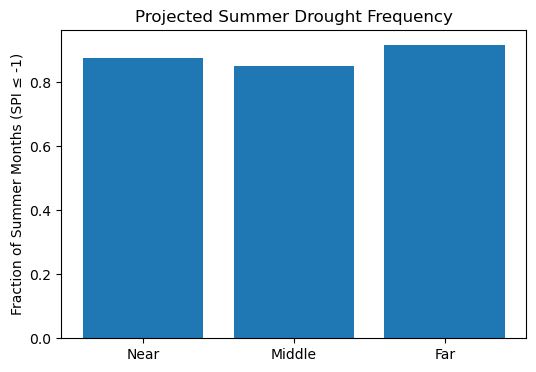

In [32]:
def drought_fraction(df):
    return (df["SPI"] <= -1).sum() / len(df)

freqs = {
    "Near": drought_fraction(near_future),
    "Middle": drought_fraction(middle_future),
    "Far": drought_fraction(far_future)
}

plt.figure(figsize=(6,4))
plt.bar(freqs.keys(), freqs.values())
plt.ylabel("Fraction of Summer Months (SPI ≤ -1)")
plt.title("Projected Summer Drought Frequency")
plt.show()


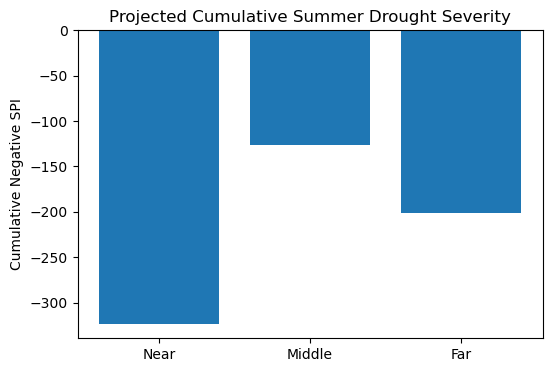

In [33]:
def cumulative_severity(df):
    return df[df["SPI"] < 0]["SPI"].sum()

sev = {
    "Near": cumulative_severity(near_future),
    "Middle": cumulative_severity(middle_future),
    "Far": cumulative_severity(far_future)
}

plt.figure(figsize=(6,4))
plt.bar(sev.keys(), sev.values())
plt.ylabel("Cumulative Negative SPI")
plt.title("Projected Cumulative Summer Drought Severity")
plt.show()
